# IRIS DATASET CLASSIFICATION USING ANN METHOD

DATASET LINK: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 
Four features are measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniqu.

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).es

# 1. IMPORTING NECESSARY PACKAGES AND LIBRARIES

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [86]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
import keras_tuner as kt
from keras.callbacks import EarlyStopping

# 2. IMPORTING AND READING DATASET

In [87]:
df = pd.read_csv('IRIS.csv')

In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df_copy = df.copy()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 3. EDA

In [91]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [92]:
df.duplicated().sum()

3

In [93]:
df.drop_duplicates(inplace = True)

In [94]:
df.duplicated().sum()

0

In [95]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
df['species'] = df['species'].str.split('-').str.get(1)

In [97]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 4. SOME VISUALS

<Axes: ylabel='count'>

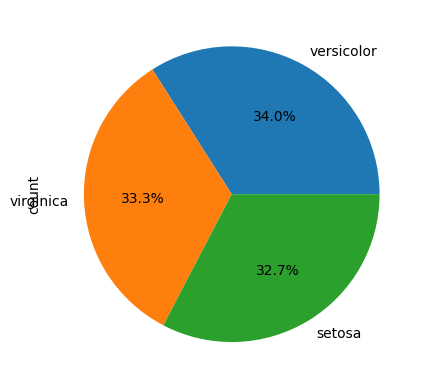

In [98]:
df['species'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [99]:
df['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

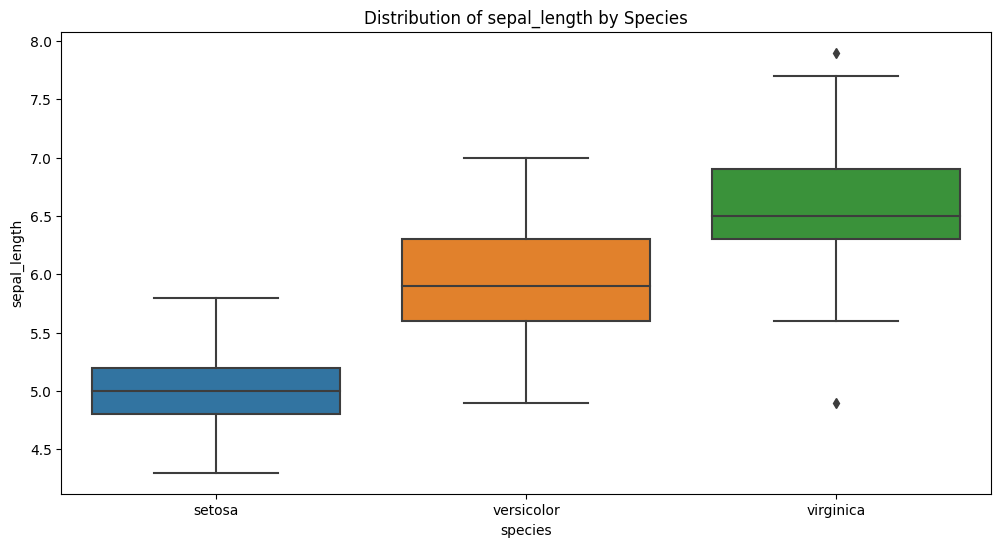

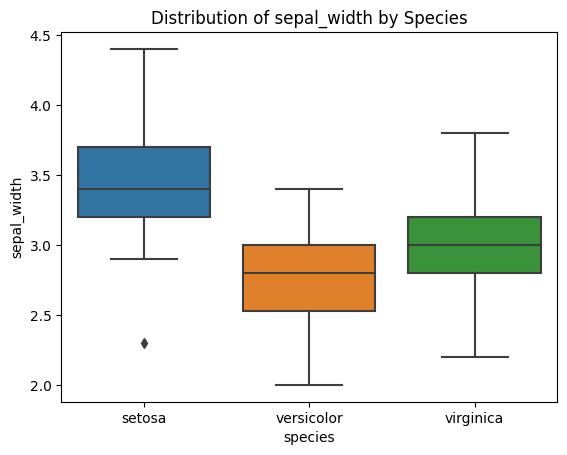

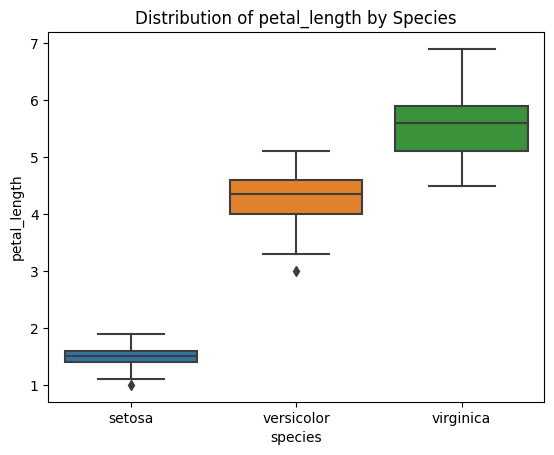

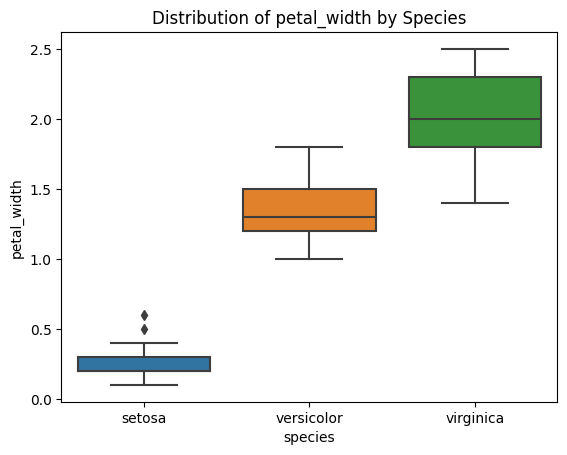

In [100]:
plt.figure(figsize=(12, 6))
for col in df.columns[:-1]:  # Exclude the species column
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Distribution of {col} by Species')
    plt.show()

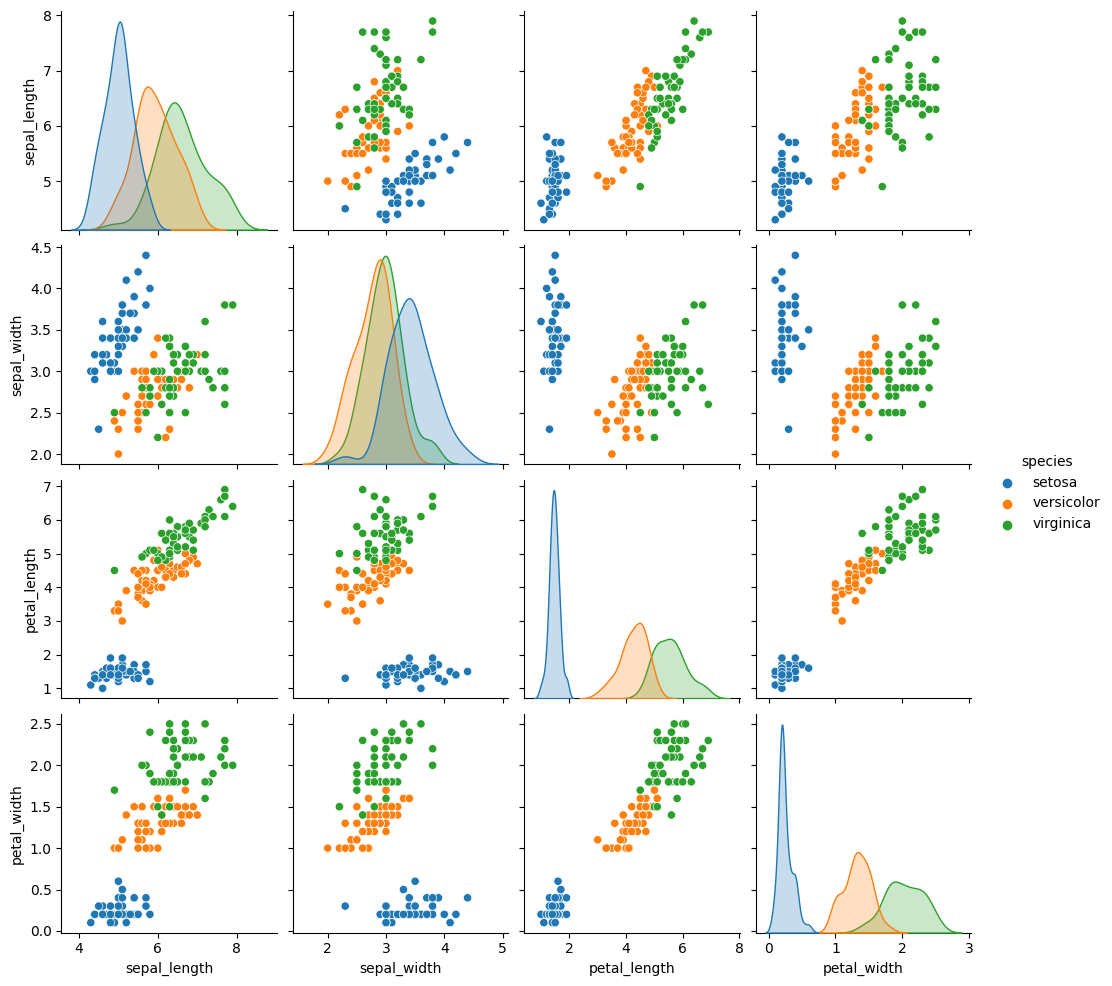

In [101]:
sns.pairplot(df, hue = 'species')

In [102]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 5. MODELLING BEGINS
### ARTIFICIAL NEURAL NETWORK (ANN)

In [103]:
x = df.drop(columns=['species'])
y = df['species']

In [104]:
lb = LabelEncoder()

In [105]:
y_scaled = lb.fit_transform(y)

In [106]:
y_scaled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
scaler = StandardScaler()

In [108]:
x_scaled = scaler.fit_transform(x)

In [109]:
x_scaled

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

### BASIC

In [111]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = 4))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [112]:
history = model.fit(X_train, y_train, validation_split=0.33,epochs=100, verbose=True)

Epoch 1/100
3/3 [==============================] - 2s 241ms/step - loss: 1.1096 - accuracy: 0.3205 - val_loss: 1.0323 - val_accuracy: 0.3846
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0797 - accuracy: 0.3205 - val_loss: 1.0104 - val_accuracy: 0.4103
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0541 - accuracy: 0.3205 - val_loss: 0.9903 - val_accuracy: 0.4103
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0308 - accuracy: 0.3205 - val_loss: 0.9734 - val_accuracy: 0.4103
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0125 - accuracy: 0.3205 - val_loss: 0.9595 - val_accuracy: 0.4103
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9978 - accuracy: 0.3333 - val_loss: 0.9472 - val_accuracy: 0.4103
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.9855 - accuracy: 0.3333 - val_loss: 0.9348 - val_accuracy: 0.4359
Epoch 8/100
3/3 [==

In [113]:
history.params

{'verbose': True, 'epochs': 100, 'steps': 3}

In [114]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

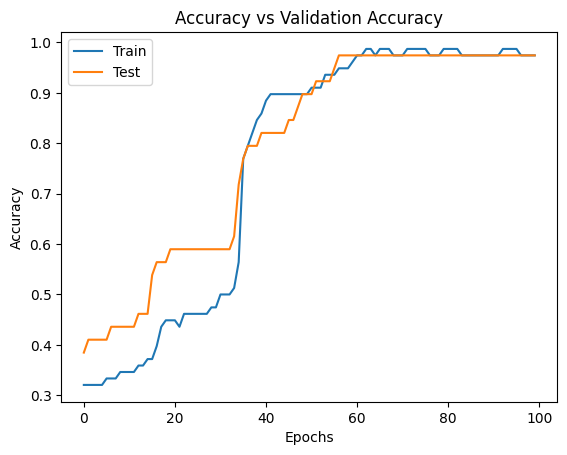

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

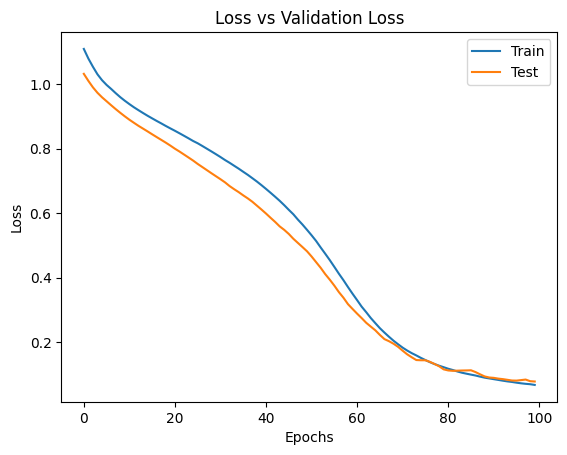

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

### HYPERPARAMETER TUNING USING KERASTUNER

In [117]:
def build_model(hp):
    new_model = Sequential()
    new_model.add(Dense(48, activation='relu', input_dim = 4))
    new_model.add(Dense(24, activation='relu'))
    new_model.add(Dense(12, activation='relu'))
    new_model.add(Dense(3, activation='softmax'))
    opt = hp.Choice('optmizer', values = ['adam', 'sgd', 'rmsprop','adadelta'])
    new_model.compile(optimizer= opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return new_model


In [118]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10, directory = 'Directory', project_name = 'Task2')

INFO:tensorflow:Reloading Tuner from Directory\Task2\tuner0.json


In [119]:
tuner.search(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [120]:
tuner.get_best_hyperparameters()[0].values

{'optmizer': 'adam'}

In [121]:
res = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [122]:
final_model = Sequential()
final_model.add(Dense(128, activation='relu', input_dim = 4))
final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(12, activation='relu'))
final_model.add(Dense(3, activation='softmax'))

final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [123]:
final = final_model.fit(X_train, y_train, validation_split=0.20, epochs= 200, verbose=True, callbacks=res)

Epoch 1/200
3/3 [==============================] - 2s 183ms/step - loss: 1.0654 - accuracy: 0.3871 - val_loss: 0.9413 - val_accuracy: 0.6667
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 0.9685 - accuracy: 0.6774 - val_loss: 0.8526 - val_accuracy: 0.8333
Epoch 3/200
3/3 [==============================] - 0s 28ms/step - loss: 0.9029 - accuracy: 0.7742 - val_loss: 0.7838 - val_accuracy: 0.7917
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 0.8422 - accuracy: 0.7634 - val_loss: 0.7232 - val_accuracy: 0.7917
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 0.7867 - accuracy: 0.7527 - val_loss: 0.6690 - val_accuracy: 0.7917
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 0.7343 - accuracy: 0.7634 - val_loss: 0.6178 - val_accuracy: 0.7917
Epoch 7/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6820 - accuracy: 0.7634 - val_loss: 0.5707 - val_accuracy: 0.7917
Epoch 8/200
3/3 [==

In [124]:
pred = final_model.predict(X_test)

1/1 [==============================] - 0s 118ms/step


In [125]:
pred_new = pred.argmax(axis = 1)

In [126]:
score = confusion_matrix(y_test, pred_new)

<Axes: >

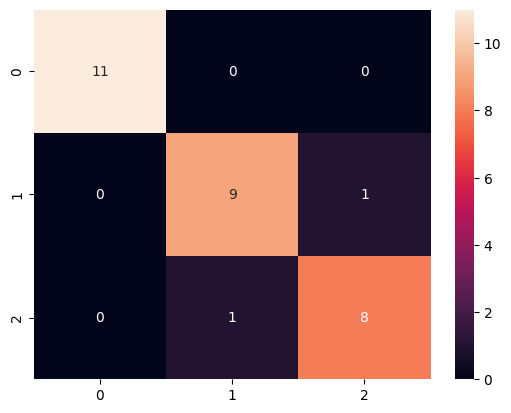

In [127]:
sns.heatmap(score, annot= True)

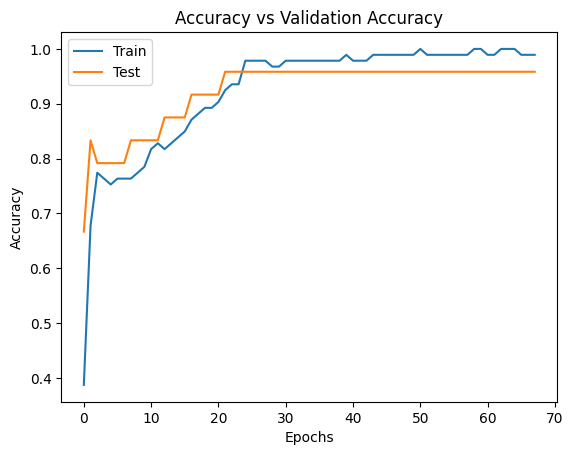

In [128]:
plt.plot(final.history['accuracy'])
plt.plot(final.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

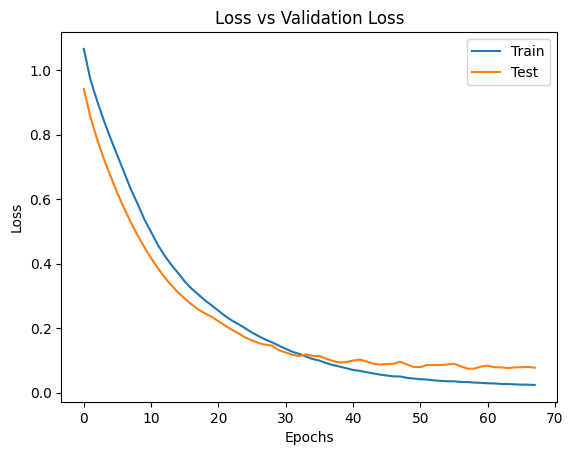

In [129]:
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [130]:
def try_model(hp):
    try_model = Sequential()
    units = hp.Int('units', min_value= 8, max_value = 128)
    try_model.add(Dense(units = units, activation='relu', input_dim = 4))
    try_model.add(Dense(units = units, activation='relu'))
    try_model.add(Dense(units = units, activation='relu'))
    try_model.add(Dense(3, activation='softmax'))
    try_model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return try_model


In [131]:
tuner_new = kt.RandomSearch(try_model, objective='val_accuracy', max_trials=20, directory = 'Directory 3', project_name = 'Task2 final')

INFO:tensorflow:Reloading Tuner from Directory 3\Task2 final\tuner0.json


In [132]:
tuner_new.search(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [133]:
tuner_new.get_best_hyperparameters()[0].values

{'units': 20}

# 6. FINALLY

In [138]:
fun_model = Sequential()
fun_model.add(Dense(20, activation='relu', input_dim = 4))
fun_model.add(Dense(12, activation = 'relu'))
fun_model.add(Dense(6, activation = 'relu'))
fun_model.add(Dense(3, activation='softmax'))

fun_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
over = fun_model.fit(X_train, y_train, epochs= 200, callbacks= res, validation_data=(X_test, y_test), verbose=True)

Epoch 1/200
4/4 [==============================] - 2s 121ms/step - loss: 1.0374 - accuracy: 0.4103 - val_loss: 1.0132 - val_accuracy: 0.4667
Epoch 2/200
4/4 [==============================] - 0s 23ms/step - loss: 1.0155 - accuracy: 0.5299 - val_loss: 0.9907 - val_accuracy: 0.6000
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9944 - accuracy: 0.6239 - val_loss: 0.9675 - val_accuracy: 0.6333
Epoch 4/200
4/4 [==============================] - 0s 30ms/step - loss: 0.9724 - accuracy: 0.6667 - val_loss: 0.9440 - val_accuracy: 0.7000
Epoch 5/200
4/4 [==============================] - 0s 26ms/step - loss: 0.9500 - accuracy: 0.6838 - val_loss: 0.9213 - val_accuracy: 0.7333
Epoch 6/200
4/4 [==============================] - 0s 30ms/step - loss: 0.9287 - accuracy: 0.7009 - val_loss: 0.8988 - val_accuracy: 0.7333
Epoch 7/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9059 - accuracy: 0.7265 - val_loss: 0.8762 - val_accuracy: 0.7333
Epoch 8/200
4/4 [==

In [140]:
results = fun_model.predict(X_test)

1/1 [==============================] - 0s 118ms/step


In [141]:
results = results.argmax(axis = 1)

In [142]:
cnf = confusion_matrix(y_test, results)

<Axes: >

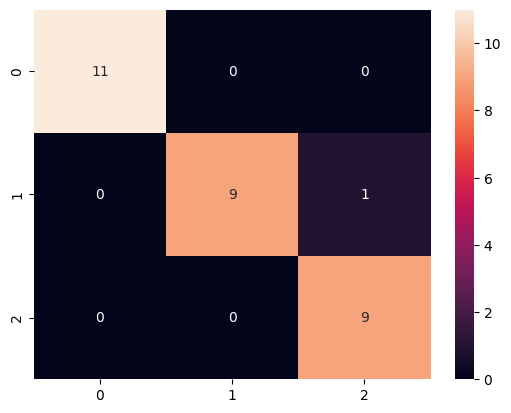

In [143]:
sns.heatmap(cnf, annot=True)

In [144]:
over.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

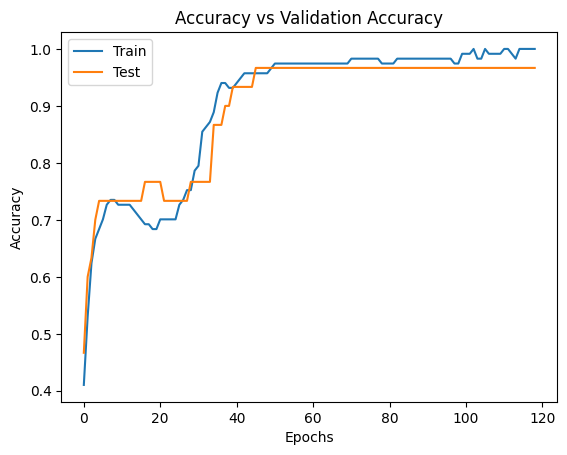

In [145]:
plt.plot(over.history['accuracy'])
plt.plot(over.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

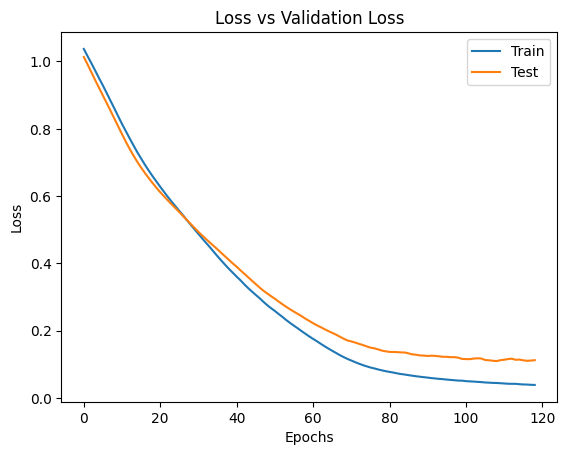

In [146]:
plt.plot(over.history['loss'])
plt.plot(over.history['val_loss'])
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [147]:
tt = accuracy_score(y_test, results)
tt

0.9666666666666667

# THANKS